<h1 align='center'>Loan Prediction Using Machine Learning</h1>

###### By: [jihad akbar](https://github.com/jihadakbr) | Dataset: [Loan Prediction Based on Customer Behavior (Kaggle)](https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior)
###### You can see this notebook clearly using this link [nbviewer.org](https://nbviewer.org/github/jihadakbr/loan-prediction-using-machine-learning/blob/main/Loan%20Prediction%20Using%20Machine%20Learning.ipynb).

<div id="toc"><h1>Table of Contents</h1></div>

<div id="backTotop" class="alert alert-block alert-info">
    <ol>
        <li><a href="#content">Content of Dataset</a></li>
        <li><a href="#importing">Importing Required Libraries</a></li>
        <li><a href="#reading">Reading the CSV File</a></li>
        <li><a href="#explor">Exploring the Data</a></li>
        	<ul style="list-style-type:none;padding:0;margin:0">
                <li>4a. <a href="#num_rows_cols">The number of rows and columns</a></li>
                <li>4b. <a href="#data_dist">Data distribution</a></li>
                <li>4c. <a href="#unique">Unique values for each feature</a></li>
        	</ul>
        <li><a href="#cleaning">Data Cleaning</a></li>
        	<ul style="list-style-type:none;padding:0;margin:0">
                <li>5a. <a href="#check_dtype">Checking Datatype</a></li>
                <li>5b. <a href="#check_ms">Checking Missing Value</a></li>
                <li>5c. <a href="#check_duplicate">Checking Duplicated Value</a></li>
                <li>5d. <a href="#delete_cols">Deleting Unnecessary Columns</a></li>
                <li>5e. <a href="#check_outliers">Checking Outliers</a></li>
        	</ul>
        <li><a href="#data_visualization">Data Visualization</a></li>
        	<ul style="list-style-type:none;padding:0;margin:0">
                <li>6a. <a href="#num_data_dist">Numerical Data Distribution</a></li>
                <li>6b. <a href="#cat_data_dist">Categorical Data Distribution</a></li>
                <li>6c. <a href="#tar_var_dist">Target Variable Distribution</a></li>
                <li>6d. <a href="#num_data_corr">Numerical Data Correlation</a></li>
        	</ul>        
        <li><a href="#chi_square">Chi Square Test (Non-Parametric Hypothesis Testing)</a></li>
        <li><a href="#encod_features">Encoding Features</a></li>
        	<ul style="list-style-type:none;padding:0;margin:0">
                <li>8a. <a href="#dummy_encod">Dummy encoding</a></li>
                <li>8b. <a href="#feature_hashing">Feature Hashing</a></li>
        	</ul>  
        <li><a href="#splitting">Splitting The Dataset Into The Training Set and Test Set, Applying K-Fold Cross Validation, SMOTE, and Standard Scaler</a></li>
        <li><a href="#ml_model">Machine Learning Model</a></li>
        	<ul style="list-style-type:none;padding:0;margin:0">
                <li>10a. <a href="#random_forest">Random Forest Classifier</a></li>
                <li>10b. <a href="#gradient_boosting">Gradient Boosting Classifier</a></li>
                <li>10c. <a href="#adaboost">AdaBoost Classifier</a></li>
                <li>10d. <a href="#etc">Extra Tree Classifier</a></li>
                <li>10e. <a href="#dtc">Decision Tree Classifier</a></li>
                <li>10f. <a href="#knn">KNN</a></li>
                <li>10g. <a href="#xgboost">XGBoost</a></li>
                <li>10h. <a href="#passive_aggressive">Passive Aggressive Classifier</a></li>
        	</ul>          
        <li><a href="#results">Results</a></li>
        <li><a href="#save">Save the Trained Model</a></li>
    </ol>
</div>
<br>
<hr>


<div id="content">
    <div><h1>1. Content of Dataset</h1></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

| No. | Features | Description |
|:---|:---|:---|
| 1 | ID | id of the user |
| 2 | income | income of the user |
| 3 | age | age of the user |
| 4 | experience | professional experience of the user in years |
| 5 | profession | profession |
| 6 | married | whether married or single |
| 7 | house_ownership | owned or rented or neither |
| 8 | car_ownership | does the person own a car |
| 9 | current_job_years | years of experience in the current job |
| 10 | current_house_years | number of years in the current residence |
| 11 | city | city of residence |
| 12 | state | state of residence |
| 13 | risk_flag | defaulted on a loan (target variable) |

* The **risk_flag** indicates whether there has been a default in the past or not.
* risk flag = 1 → **defaulter**: a person who fails to fulfill a duty, obligation, or undertaking, especially to pay a debt.
* risk flag = 0 → **non-defaulter**

<div id="importing">
    <div><h1>2. Importing Required Libraries</h1></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [1]:
import warnings
warnings.filterwarnings("ignore")
from ml_utils import *

<div id="reading">
    <div><h1>3. Reading the CSV File</h1></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [2]:
data = pd.read_csv('Training Data.csv')
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


<div id="explor">
    <div><h1>4. Exploring the Data</h1></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

<div id="num_rows_cols">
    <div><h2>4a. The number of rows and columns</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [3]:
data.shape

(252000, 13)

<div id="data_dist">
    <div><h2>4b. Data distribution</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


<div id="unique">
    <div><h2>4c. Unique values for each feature</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [5]:
data.nunique()

Id                   252000
Income                41920
Age                      59
Experience               21
Married/Single            2
House_Ownership           3
Car_Ownership             2
Profession               51
CITY                    317
STATE                    29
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         5
Risk_Flag                 2
dtype: int64

<div id="cleaning">
    <div><h1>5. Data Cleaning</h1></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

<div id="check_dtype">
    <div><h2>5a. Checking Datatype</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [6]:
data.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

<div id="check_ms">
    <div><h2>5b. Checking Missing Value</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [7]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

<div id="check_duplicate">
    <div><h2>5c. Checking Duplicated Value</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [8]:
data.duplicated().sum()

0

<div id="delete_cols">
    <div><h2>5d. Deleting Unnecessary Columns</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [9]:
data = data.drop(['Id', 'CITY'], axis = 1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   STATE              252000 non-null  object
 8   CURRENT_JOB_YRS    252000 non-null  int64 
 9   CURRENT_HOUSE_YRS  252000 non-null  int64 
 10  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 21.1+ MB


<div id="check_outliers">
    <div><h2>5e. Checking Outliers</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [11]:
data.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


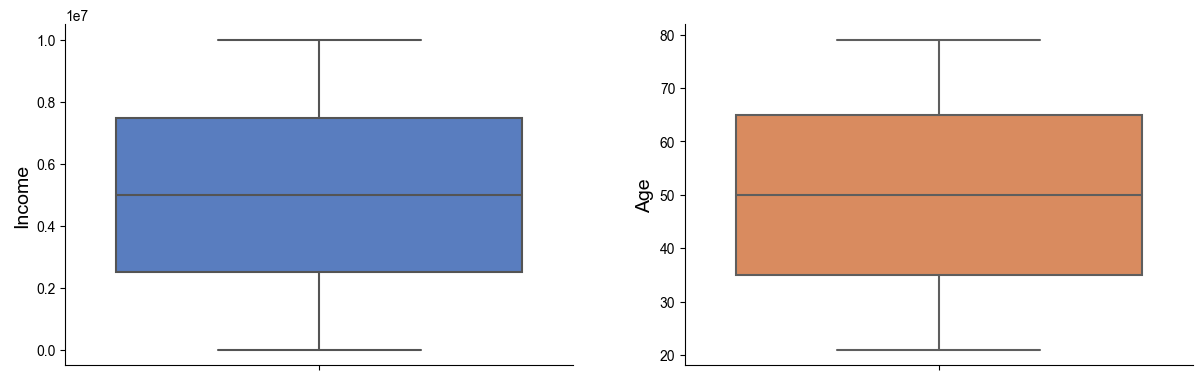

In [12]:
fig, ax = outliers_subplot(data,"Income", "Age")
plt.show()

There are no missing values, duplicates, and outliers in the dataset.

<div id="data_visualization">
    <div><h1>6. Data Visualization</h1></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

<div id="num_data_dist">
    <div><h2>6a. Numerical Data Distribution</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

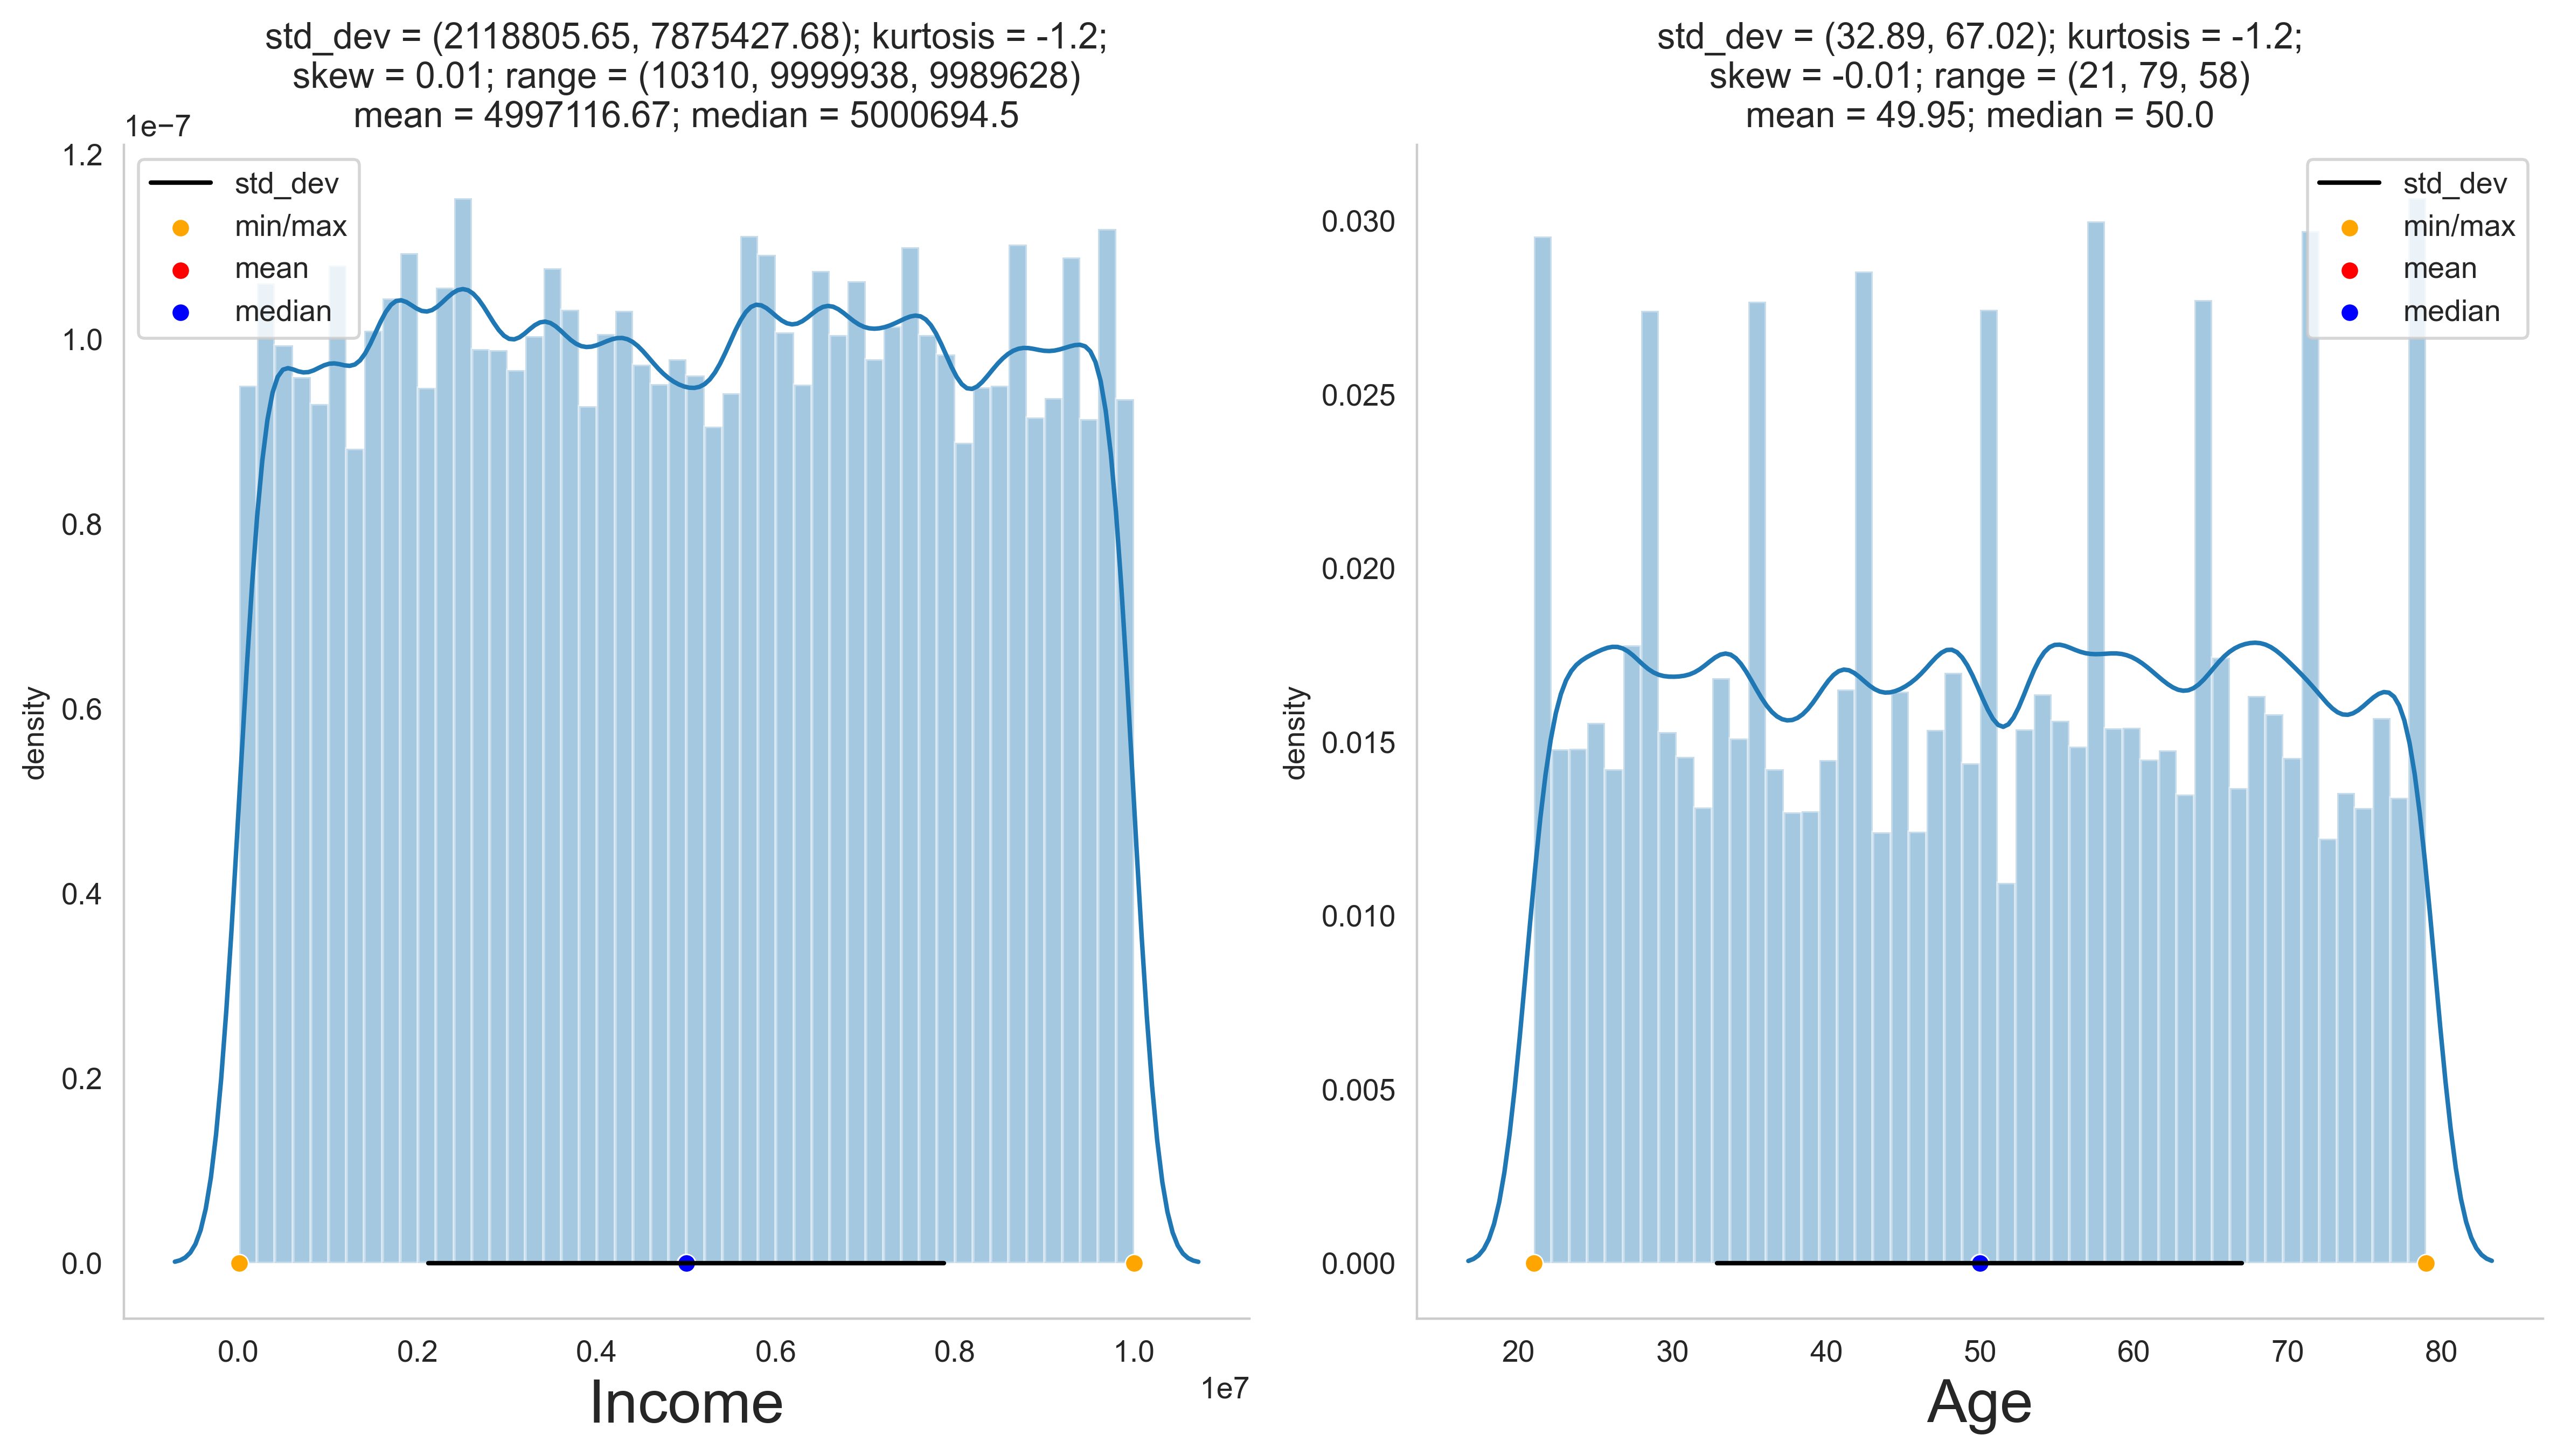

In [13]:
num_dist(data[["Income", "Age"]])

<div id="cat_data_dist">
    <div><h2>6b. Categorical Data Distribution</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [14]:
data.dtypes

Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [15]:
data.nunique()

Income               41920
Age                     59
Experience              21
Married/Single           2
House_Ownership          3
Car_Ownership            2
Profession              51
STATE                   29
CURRENT_JOB_YRS         15
CURRENT_HOUSE_YRS        5
Risk_Flag                2
dtype: int64

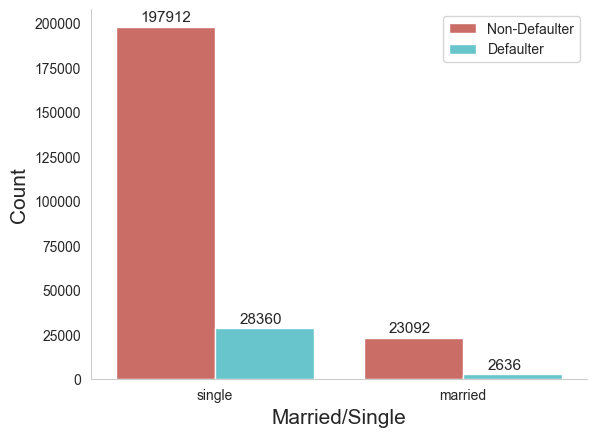

In [16]:
cat_dist(data, "Married/Single", "Risk_Flag", "Non-Defaulter","Defaulter", "hls")

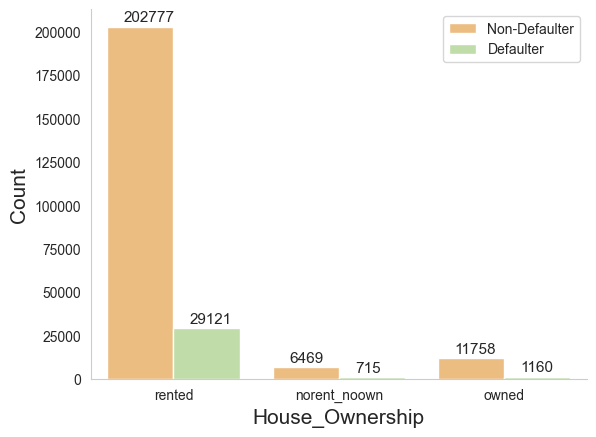

In [17]:
cat_dist(data, "House_Ownership", "Risk_Flag", "Non-Defaulter","Defaulter", "Spectral")

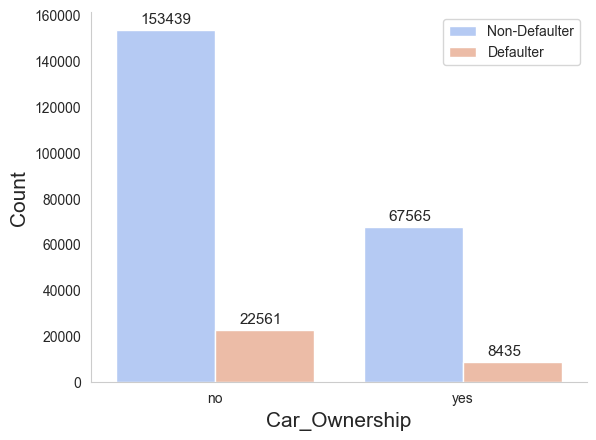

In [18]:
cat_dist(data, "Car_Ownership", "Risk_Flag", "Non-Defaulter","Defaulter", "coolwarm")

<div id="tar_var_dist">
    <div><h2>6c. Target Variable Distribution</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

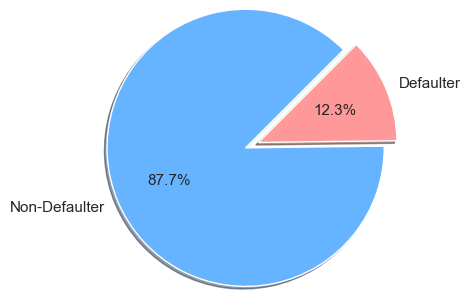

In [19]:
target_dist(data,"Risk_Flag","Non-Defaulter","Defaulter")

87.7% of people are Non-Defaulter (risk flag = 0), while the other 12.3% are defaulters (risk flag = 1).

<div id="num_data_corr">
    <div><h2>6d. Numerical Data Correlation</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

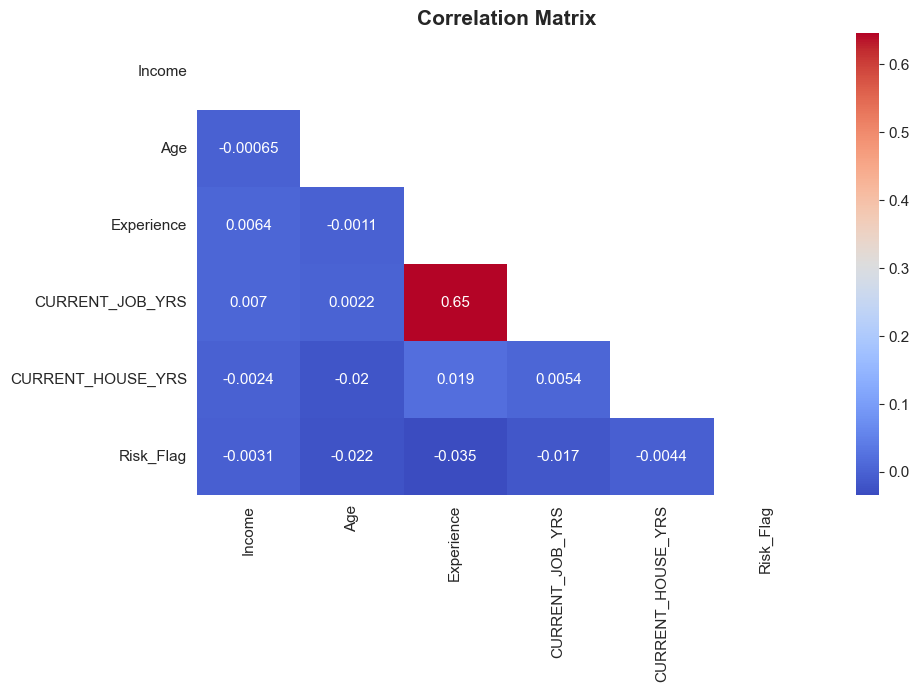

In [20]:
num_corr(data)

There are strong correlation between Experience and CURRENT_JOB_YRS (65%).

<div id="chi_square">
    <div><h1>7.  Chi Square Test (Non-Parametric Hypothesis Testing)</h1></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [21]:
data.dtypes

Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [22]:
chi_square_test(data,"Married/Single","Risk_Flag")

p-value is:  3.773053705715196e-26
Dependent (reject H0)
This feature is dependent on the target variable.


In [23]:
chi_square_test(data,"House_Ownership","Risk_Flag")

p-value is:  1.8381930028370595e-40
Dependent (reject H0)
This feature is dependent on the target variable.


In [24]:
chi_square_test(data,"Car_Ownership","Risk_Flag")

p-value is:  1.7350853850183742e-33
Dependent (reject H0)
This feature is dependent on the target variable.


In [25]:
chi_square_test(data,"Profession","Risk_Flag")

p-value is:  5.108641602000937e-98
Dependent (reject H0)
This feature is dependent on the target variable.


In [26]:
chi_square_test(data,"STATE","Risk_Flag")

p-value is:  2.0057472384130266e-136
Dependent (reject H0)
This feature is dependent on the target variable.


<div id="encod_features">
    <div><h1>8. Encoding Features</h1></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [27]:
data.dtypes

Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [28]:
data.nunique()

Income               41920
Age                     59
Experience              21
Married/Single           2
House_Ownership          3
Car_Ownership            2
Profession              51
STATE                   29
CURRENT_JOB_YRS         15
CURRENT_HOUSE_YRS        5
Risk_Flag                2
dtype: int64

<div id="dummy_encod">
    <div><h2>8a. Dummy encoding</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [29]:
data = pd.get_dummies(data, columns=['Married/Single','House_Ownership', 'Car_Ownership'], drop_first=True)

In [30]:
data.head(1)

,Income,Age,Experience,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes
0,1303834,23,3,Mechanical_engineer,Madhya_Pradesh,3,13,0,1,0,1,0


<div id="feature_hashing">
    <div><h2>8b. Feature Hashing</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [31]:
X = data.drop(['Risk_Flag'], axis=1)
y = data["Risk_Flag"]

In [32]:
HE = HashingEncoder(cols=["Profession","STATE"]).fit(X, y)
X = HE.transform(X)

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   col_0                   252000 non-null  int64
 1   col_1                   252000 non-null  int64
 2   col_2                   252000 non-null  int64
 3   col_3                   252000 non-null  int64
 4   col_4                   252000 non-null  int64
 5   col_5                   252000 non-null  int64
 6   col_6                   252000 non-null  int64
 7   col_7                   252000 non-null  int64
 8   Income                  252000 non-null  int64
 9   Age                     252000 non-null  int64
 10  Experience              252000 non-null  int64
 11  CURRENT_JOB_YRS         252000 non-null  int64
 12  CURRENT_HOUSE_YRS       252000 non-null  int64
 13  Married/Single_single   252000 non-null  uint8
 14  House_Ownership_owned   252000 non-null  uint8
 15  

In [34]:
data_testing_for_the_model = pd.concat([X, y], axis=1, join='inner')

In [35]:
data_testing_for_the_model.head(1)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Risk_Flag
0,1,0,0,1,0,0,0,0,1303834,23,3,3,13,1,0,1,0,0


In [36]:
# For testing the Model
data_testing_for_the_model.to_csv('Data Testing for the Model.csv')

<div id="splitting">
    <div><h1>9. Splitting The Dataset Into The Training Set and Test Set, Applying K-Fold Cross Validation, SMOTE, and Standard Scaler</h1></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

**def model_val(model,X,y)** → ml_utils.py

<div id="ml_model">
    <div><h1>10. Machine Learning Model</h1></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

<div id="random_forest">
    <div><h2>10a. Random Forest Classifier</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [37]:
RFC = ensemble.RandomForestClassifier()
model_val(RFC,X,y)

RandomForestClassifier() cross validation score is 0.8930307539682539
RandomForestClassifier() accuracy score is 0.8918849206349206
RandomForestClassifier() precision score is 0.5451381091399057
RandomForestClassifier() recall score is 0.7764273148888533
RandomForestClassifier() f1 score is 0.6405435714756911


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('RandomForestClassifier()', RandomForestClassifier())])

<div id="gradient_boosting">
    <div><h2>10b. Gradient Boosting Classifier</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [38]:
GBC = ensemble.GradientBoostingClassifier()
model_val(GBC,X,y)

GradientBoostingClassifier() cross validation score is 0.6681150793650794
GradientBoostingClassifier() accuracy score is 0.67
GradientBoostingClassifier() precision score is 0.18261880007339001
GradientBoostingClassifier() recall score is 0.4775307852230929
GradientBoostingClassifier() f1 score is 0.2642010263670147


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('GradientBoostingClassifier()', GradientBoostingClassifier())])

<div id="adaboost">
    <div><h2>10c. AdaBoost Classifier</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [39]:
ABC = ensemble.AdaBoostClassifier()
model_val(ABC,X,y)

AdaBoostClassifier() cross validation score is 0.607485119047619
AdaBoostClassifier() accuracy score is 0.6005357142857143
AdaBoostClassifier() precision score is 0.1502721225559363
AdaBoostClassifier() recall score is 0.47689109227570764
AdaBoostClassifier() f1 score is 0.22853201517415794


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('AdaBoostClassifier()', AdaBoostClassifier())])

<div id="etc">
    <div><h2>10d. Extra Tree Classifier</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [40]:
ET = ensemble.ExtraTreesClassifier()
model_val(ET,X,y)

ExtraTreesClassifier() cross validation score is 0.8921577380952381
ExtraTreesClassifier() accuracy score is 0.8908333333333334
ExtraTreesClassifier() precision score is 0.5418198017596614
ExtraTreesClassifier() recall score is 0.7780265472573165
ExtraTreesClassifier() f1 score is 0.6387867647058824


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('ExtraTreesClassifier()', ExtraTreesClassifier())])

<div id="dtc">
    <div><h2>10e. Decision Tree Classifier</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [41]:
DTC = tree.DecisionTreeClassifier()
model_val(DTC,X,y)

DecisionTreeClassifier() cross validation score is 0.8726785714285714
DecisionTreeClassifier() accuracy score is 0.8700396825396826
DecisionTreeClassifier() precision score is 0.48615384615384616
DecisionTreeClassifier() recall score is 0.83383975691668
DecisionTreeClassifier() f1 score is 0.6142066203321945


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('DecisionTreeClassifier()', DecisionTreeClassifier())])

<div id="knn">
    <div><h2>10f. KNN</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [42]:
KNN = neighbors.KNeighborsClassifier()
model_val(KNN,X,y)

KNeighborsClassifier() cross validation score is 0.8862599206349205
KNeighborsClassifier() accuracy score is 0.8863095238095238
KNeighborsClassifier() precision score is 0.5463077740393129
KNeighborsClassifier() recall score is 0.493363185670878
KNeighborsClassifier() f1 score is 0.5184873949579831


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('KNeighborsClassifier()', KNeighborsClassifier())])

<div id="xgboost">
    <div><h2>10g. XGBoost</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [43]:
XGB = xgb.XGBClassifier()
model_val(XGB,X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) cross validation score is 0.8670386904761905
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              en

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('XGBClassifier(base_score=None, booster=None, '
                 'callbacks=None,\n'
                 '              colsample_bylevel=None, '
                 'colsample_bynode=None,\n'
                 '              colsample_bytree=None, '
                 'early_stopping_rounds=None,\n'
                 '              enable_categorical=False, eval_metric=None, '
                 'feature_types=None,\n'
                 '              gamma=None, gpu_id=None, gro...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

<div id="passive_aggressive">
    <div><h2>10h. Passive Aggressive Classifier</h2></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [44]:
PAC = linear_model.PassiveAggressiveClassifier()
model_val(PAC,X,y)

PassiveAggressiveClassifier() cross validation score is 0.5138095238095238
PassiveAggressiveClassifier() accuracy score is 0.5412103174603174
PassiveAggressiveClassifier() precision score is 0.1287738755391251
PassiveAggressiveClassifier() recall score is 0.4679353910123141
PassiveAggressiveClassifier() f1 score is 0.2019672131147541


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('PassiveAggressiveClassifier()',
                 PassiveAggressiveClassifier())])

<div id="results">
    <div><h1>11. Results</h1></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [45]:
model_df

{RandomForestClassifier(): 89.3,
 GradientBoostingClassifier(): 66.81,
 AdaBoostClassifier(): 60.75,
 ExtraTreesClassifier(): 89.22,
 DecisionTreeClassifier(): 87.27,
 KNeighborsClassifier(): 88.63,
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...): 86.7,
 PassiveAggressiveClassifier():

The **Random Forest Classifier** model is the best suitable for our dataset, with an average cross-validation score of **89.30%**. Alternatively, the **Extra Trees Classifier** model can also consider since it gives a score of **89.22%**.

<div id="save">
    <div><h1>12. Save the Trained Model</h1></div>
    <div style="text-align: right;"><a href="#toc" style="text-decoration:none;">↑ Table of Contents</a></div>
</div>

In [46]:
RFC = ensemble.RandomForestClassifier()
model_val(RFC,X,y)

RandomForestClassifier() cross validation score is 0.8927678571428572
RandomForestClassifier() accuracy score is 0.8923015873015873
RandomForestClassifier() precision score is 0.5464998309097058
RandomForestClassifier() recall score is 0.7753078522309291
RandomForestClassifier() f1 score is 0.6411002380322666


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('RandomForestClassifier()', RandomForestClassifier())])